<a href="https://colab.research.google.com/github/BLayus/visualizacao_exploratoria_exercicios/blob/master/Data_Viz_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Passo 0 - link para o repositório do git 

In [1]:
# Git clone para utilizar o repositório remoto do git

! git clone https://github.com/BLayus/visualizacao_exploratoria_exercicios

Cloning into 'visualizacao_exploratoria_exercicios'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 47 (delta 12), reused 8 (delta 8), pack-reused 24
Unpacking objects: 100% (47/47), done.


In [2]:
ls

sample_data/  visualizacao_exploratoria_exercicios/


In [3]:
cd visualizacao_exploratoria_exercicios/

/content/visualizacao_exploratoria_exercicios


In [4]:
cd 02-exercicios-seaborn/

/content/visualizacao_exploratoria_exercicios/02-exercicios-seaborn


In [5]:
ls

pokemon.csv  visualizacao_com_seaborn.ipynb


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('pokemon.csv', encoding= 'latin-1')

In [8]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


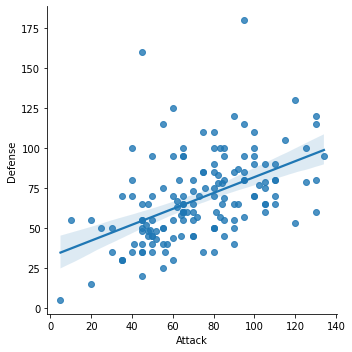

In [9]:
# Recomendado

sns.lmplot(x='Attack', y='Defense', data=df)

### TAREFA 01

Usando a função sns.lmplot(), plote um gráfico de dispersão sem a linha de regressão e agrupe os pokemons por estágio de evolução colorindo-os (coluna 'Stage').

DICA 01: Use o argumento fit_reg para remover a linha de regressão.

DICA 02: Use o argumento hue e o valor 'Stage' para colorir os pontos.

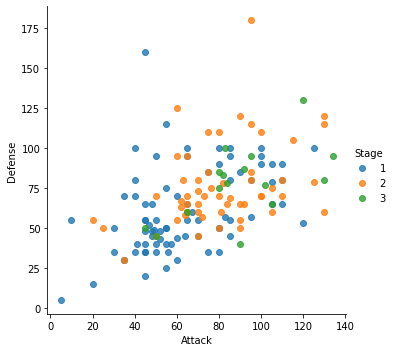

In [10]:
sns.lmplot(x= 'Attack', y= 'Defense', data= df, hue= 'Stage', fit_reg= False)

### TAREFA 02

Usando o Matplotlib, mude os nomes dos eixos x e y para "Ataque" e "Defesa", respectivamente.

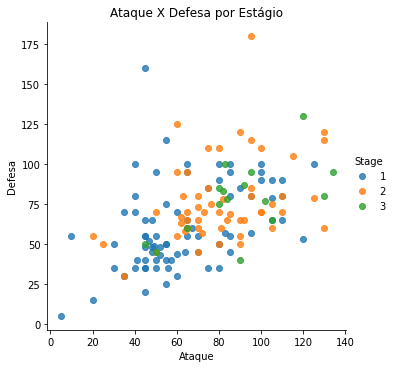

In [11]:
ax= sns.lmplot(x= 'Attack', y= 'Defense', data= df, hue= 'Stage', fit_reg= False)

plt.xlabel('Ataque')
plt.ylabel('Defesa')
plt.title('Ataque X Defesa por Estágio')

plt.show()

### TAREFA 03

Remova as colunas "Total", "Stage" e "Legendary" do dataframe e repasse o resultado para a função de plotagem sns.boxplot().

Dica: Utilize o método drop() do dataframe para remover as colunas indesejadas.

In [12]:

df.drop(columns= ['Total', 'Stage', 'Legendary', '#'], inplace= True)


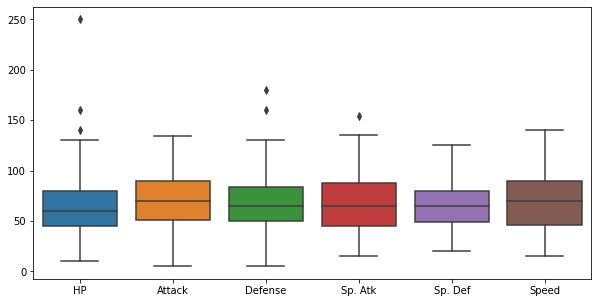

In [13]:
fig= plt.figure(figsize= (10,5))
sns.boxplot(data= df)


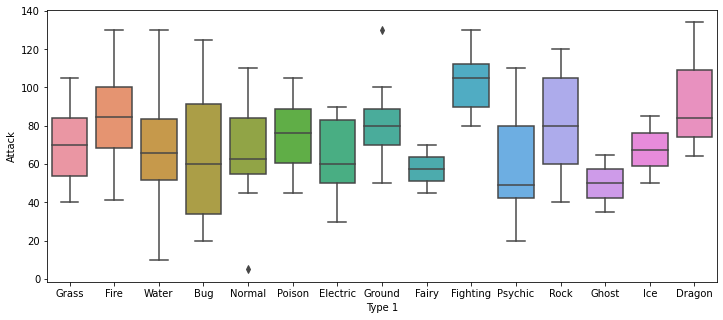

In [14]:

fig= plt.figure(figsize= (12,5))
sns.boxplot(data= df, x='Type 1', y= 'Attack')


### TAREFA 04

Alterne entre os temas do Seaborn.

DICA: Utilize a função sns.set_style() para definir os temas antes de chamar a função de plotagem.

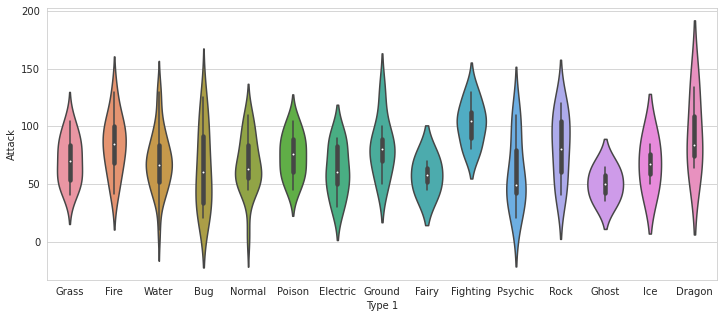

In [15]:

sns.set_style('whitegrid')
fig= plt.figure(figsize= (12, 5))
sns.violinplot(x= 'Type 1', y= 'Attack', data=df)



#### Paletas de cores

In [16]:
pokemon_cores = [
    '#78C850',  # Grass
    '#F08030',  # Fire
    '#6890F0',  # Water
    '#A8B820',  # Bug
    '#A8A878',  # Normal
    '#A040A0',  # Poison
    '#F8D030',  # Electric
    '#E0C068',  # Ground
    '#EE99AC',  # Fairy
    '#C03028',  # Fighting
    '#F85888',  # Psychic
    '#B8A038',  # Rock
    '#705898',  # Ghost
    '#98D8D8',  # Ice
    '#7038F8'  # Dragon
]

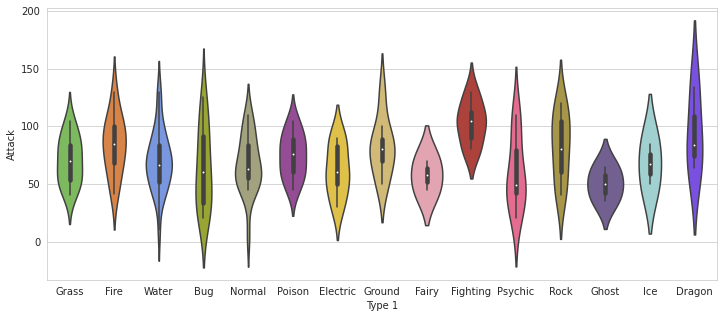

In [17]:
#Usando a paleta criada

fig= plt.figure(figsize= (12, 5))
sns.violinplot(x= 'Type 1', y= 'Attack', data=df, palette= pokemon_cores)


### TAREFA 05

Plote um gráfico de enxame (swarmplot) usando a paleta do cores do exemplo anterior - pokemon_cores.

DICA: Utilize a função de plotagem sns.swarmplot()

[Text(0, 0.5, 'Ataque'),
 Text(0.5, 0, 'Pokemon Tipo 1'),
 Text(0.5, 1.0, 'Distribuição dos Ataques por Tipo de Pokemon')]

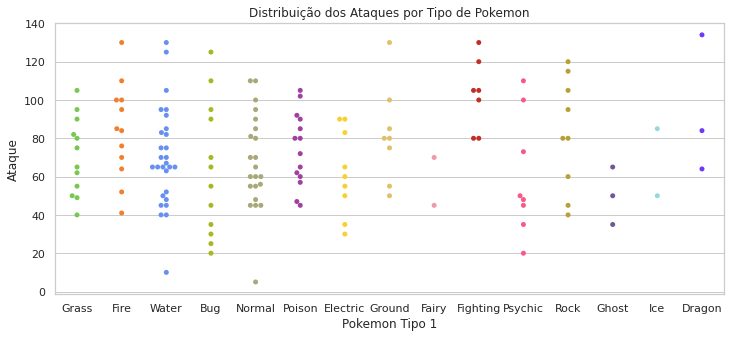

In [18]:

fig= plt.figure(figsize=(12,5))

sns.set_theme(style= 'whitegrid', palette= pokemon_cores)
ax= sns.swarmplot(data= df, x= 'Type 1', y= 'Attack')
ax.set(xlabel= 'Pokemon Tipo 1', ylabel= 'Ataque', title= 'Distribuição dos Ataques por Tipo de Pokemon' )

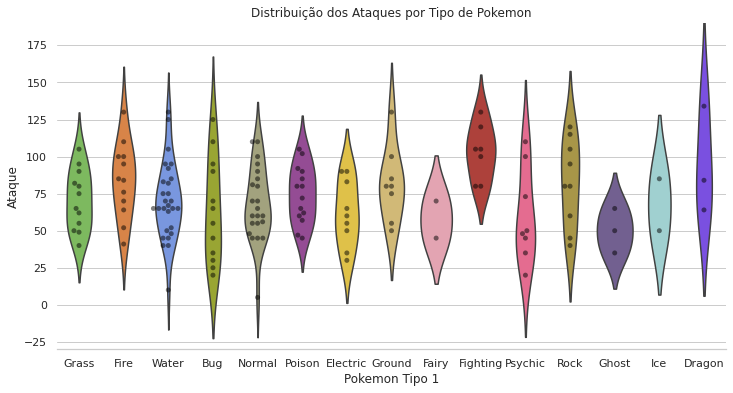

In [19]:

fig= plt.figure(figsize=(12,6))
sns.set_theme(style= 'whitegrid', palette= pokemon_cores)

ax= sns.violinplot(x= 'Type 1', y= 'Attack', data=df, inner= None)
ax= sns.swarmplot(data= df, x= 'Type 1', y= 'Attack', color= 'k', alpha= 0.5)
ax.set(xlabel= 'Pokemon Tipo 1', ylabel= 'Ataque', title= 'Distribuição dos Ataques por Tipo de Pokemon', ylim= (-30,190))
sns.despine(top= True, right= True, left= True)

### TAREFA 06

Os mapas de calor ajudam a visualizar dados do tipo matriz. Plote um heatmap do dataframe new_df.

Dica 01: Antes de plot, crie a matriz de correlação do dataframe através do método corr().

Dica 02: Utilize a função de plotagem sns.heartmap().

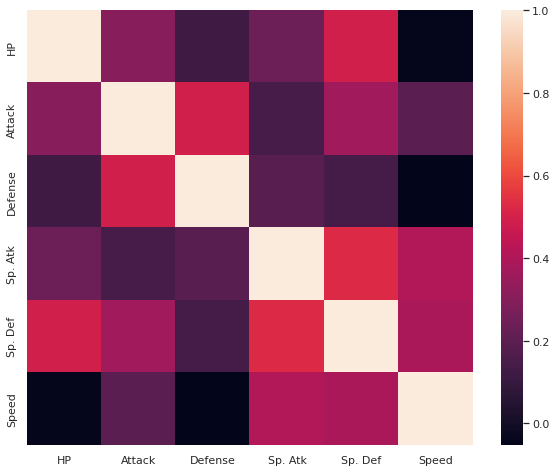

In [20]:

corr= df.corr()

fig =plt.figure(figsize=(10,8))
sns.heatmap(data= corr, cmap= 'rocket')



### TAREFA 07

Os histogramas permitem plotar as distribuições de variáveis numéricas. 

Plote um histograma usando as informações de ataque (Atack) dos pokemons.

Dica: Utilize a função de plotagem sns.distplot().

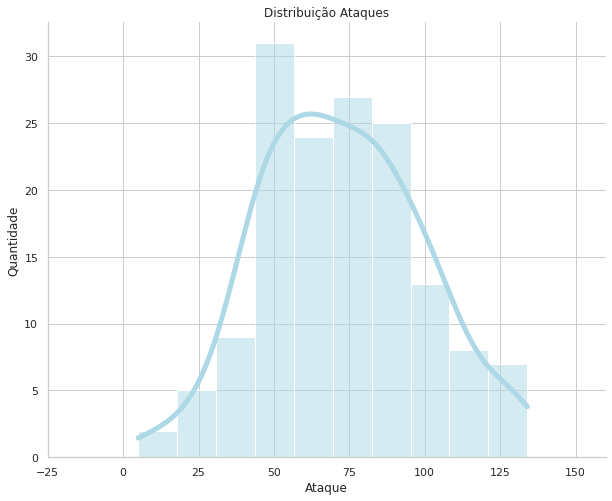

In [43]:

fig =plt.figure(figsize=(10,8))
ax = sns.histplot(data= df, x= 'Attack', color= 'lightblue', bins= 10, kde= True, line_kws = {'lw': 5})
ax.set(xlim= (-25, 160), xlabel= 'Ataque', ylabel= 'Quantidade', title= 'Distribuição Ataques')
sns.despine(right= True, top= True)

plt.show()

### TAREFA 08

Os gráficos de barra ajudam a visualizar as distribuições de variáveis categóricas. 

Plote um gráfico de barra usando a variável "Type 1".

Dica 01: Utilize a função de plotagem sns.countplot().

Dica 02: Caso a plotagem fique desajustada, aumente o tamanho usando o Matplotlib.

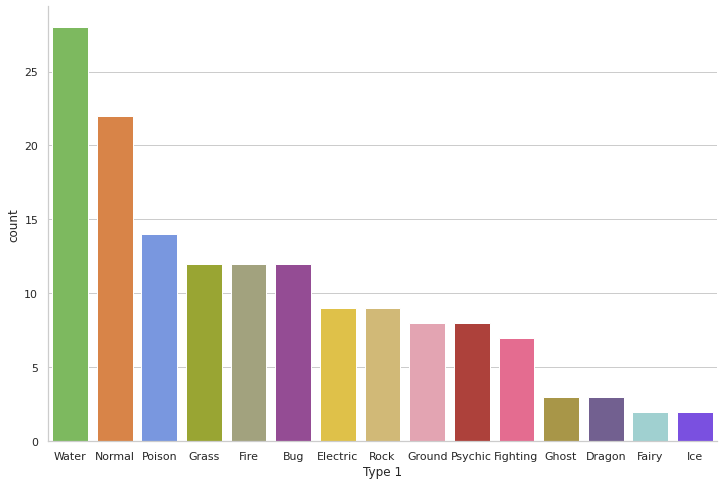

In [54]:
fig =plt.figure(figsize=(12,8))
sns.countplot(data= df, x= 'Type 1', order= df['Type 1'].value_counts().index)
ax.set(ylim= (0, 30), xlabel= 'Type 1', ylabel= 'Quantidade', title= 'Distribuição Type 1')
sns.despine(right= True, top= True)
plt.show()

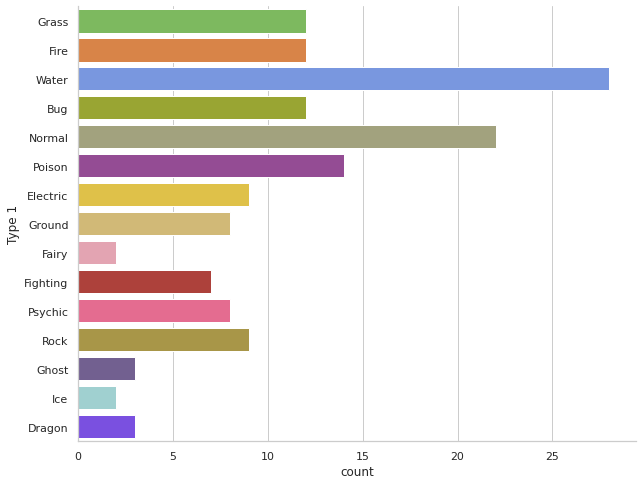

In [50]:

fig =plt.figure(figsize=(10,8))
sns.countplot(data= df, y= 'Type 1', orient= 'h')
ax.set(ylim= (0, 30), xlabel= 'Type 1', ylabel= 'Quantidade', title= 'Distribuição Type 1')
sns.despine(right= True, top= True)
plt.show()